### TASK 0: Import of recquired libraries

In [41]:
# Import the required libraries
import nibabel as nib
import numpy as np
import matplotlib.pyplot as plt
import matplotlib.animation as animation
import json
import skimage as ski

### Load the data 



In [42]:
path = 'data/'
v1_info = nib.load(path + 'A_DTU22481_20240910093808_TE4ms_TR100ms_FA20.nii.gz').header
v1 = nib.load(path + 'A_DTU22481_20240910093808_TE4ms_TR100ms_FA20.nii.gz').get_fdata()



### Visualize





In [43]:
voxel_size = v1_info['pixdim'][1:4]  # Extract voxel size (x, y, z)
print(f"Voxel size (in mm): x = {voxel_size[0]}, y = {voxel_size[1]}, z = {voxel_size[2]}")
print(v1_info['pixdim'])

Voxel size (in mm): x = 1.2999999523162842, y = 0.7422000169754028, z = 0.7422000169754028
[1.     1.3    0.7422 0.7422 0.1    0.     0.     0.    ]


(224, 512)


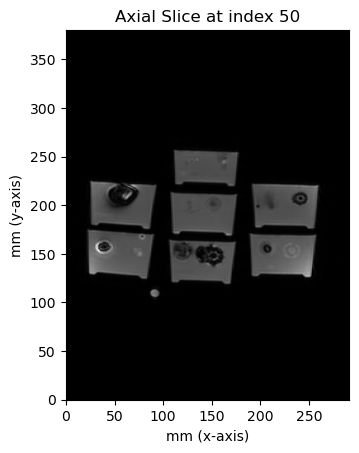

In [44]:
slice_index = 50  # Get the middle slice along the third axis (axial)



# Extract the slice
axial_slice = v1[:, :, slice_index]
print (axial_slice.shape)

# Create the figure
fig, ax = plt.subplots()

# Plot the image with proper scaling
extent = [0, axial_slice.shape[0] * voxel_size[0], 0, axial_slice.shape[1] * voxel_size[1]]
ax.imshow(axial_slice.T, cmap='gray', origin='lower', extent=extent)

# Set axis labels with units
ax.set_xlabel('mm (x-axis)')
ax.set_ylabel('mm (y-axis)')
plt.title(f'Axial Slice at index {slice_index}')

# Display the plot
plt.show()

### Crop the data to our phantom

[1.3    0.7422 0.7422]
(60, 80)


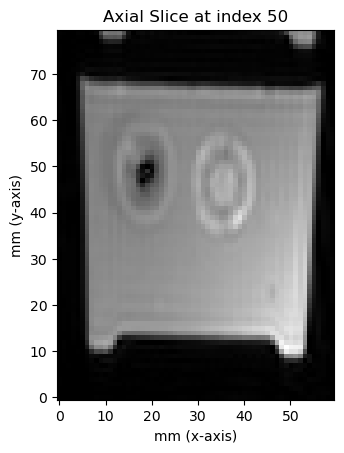

In [45]:
axial_slice_index = 60  # Get the middle slice along the third axis (axial)


v1_cropped = v1[140:200, 160:240, 0:200]
snr_outside = v1[134:145, 163:210, 50]

var_outside = np.var(snr_outside)

# Extract the slice
axial_slice = v1_cropped[:, :, axial_slice_index]

# Create the figure
fig, ax = plt.subplots()

# Plot the image with proper scaling
print(voxel_size)
print(axial_slice.shape)
extent = [0, axial_slice.shape[0], 0, axial_slice.shape[1]]
ax.imshow(axial_slice.T, cmap='gray', origin='lower' )#extent=extent)

# Set axis labels with units
ax.set_xlabel('mm (x-axis)')
ax.set_ylabel('mm (y-axis)')
plt.title(f'Axial Slice at index {slice_index}')

# Display the plot
plt.show()

### Code for choosing a point for T2* analysis later

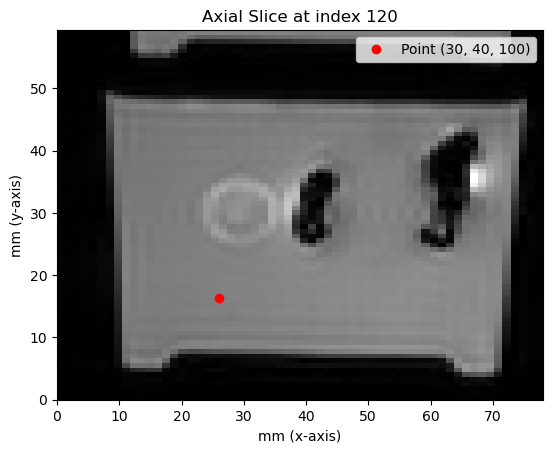

In [46]:
slice_index = 120

axial_slice = v1_cropped[:, :, slice_index]

# Dot coordinates in original 3D space
dot_coords = (20, 22, slice_index)



# Ensure the z-coordinate matches the current slice index
if dot_coords[2] == slice_index:
    # Extract the 2D dot position (x and y) for this slice
    dot_x, dot_y = dot_coords[0], dot_coords[1]

    # Create the figure
    fig, ax = plt.subplots()

    # Plot the image with proper scaling
    extent = [0, axial_slice.shape[0] * voxel_size[0], 0, axial_slice.shape[1] * voxel_size[1]]
    ax.imshow(axial_slice.T, cmap='gray', origin='lower', extent=extent)

    # Add the dot
    ax.plot(
        dot_x * voxel_size[0],  # Scale x-coordinate by voxel size
        dot_y * voxel_size[1],  # Scale y-coordinate by voxel size
        'ro',                   # Red dot
        label='Point (30, 40, 100)'
    )

    # Set axis labels with units
    ax.set_xlabel('mm (x-axis)')
    ax.set_ylabel('mm (y-axis)')
    plt.title(f'Axial Slice at index {slice_index}')
    plt.legend()

    # Display the plot
    plt.show()
else:
    print(f"Dot at {dot_coords} is not on the current slice {slice_index}.")


### Load and display the 4 data sets acquired with different echo times TE and common TR=100ms. Also lines shown for the point for T2* analysis

In [47]:

# Define the correct file paths for the 4 datasets (adjust the paths accordingly)
path = 'MR_phantom_data/'
files = [
    'A_DTU22481_20240910093808_TE4ms_TR100ms_FA20.nii.gz',
    'A_DTU22481_20240910093808_TE15ms_TR100ms_FA20.nii.gz',
    'A_DTU22481_20240910093808_TE30ms_TR100ms_FA20.nii.gz',
    'A_DTU22481_20240910093808_TE50ms_TR100ms_FA20.nii.gz'
]

# Load the datasets
v1 = nib.load(path + files[0]).get_fdata()
v2 = nib.load(path + files[1]).get_fdata()
v3 = nib.load(path + files[2]).get_fdata()
v4 = nib.load(path + files[3]).get_fdata()

# Use the same cropped phantom coordinates
# [10:80, 230:310, 0:200]
# [40:60, 275:285, 0:200]
v1_cropped = v1[140:200, 160:240, 0:200]
v2_cropped = v2[140:200, 160:240, 0:200]
v3_cropped = v3[140:200, 160:240, 0:200]
v4_cropped = v4[140:200, 160:240, 0:200]

point = (17,39,141)

# Extract the slices for each dataset
i1 = v1_cropped[:, :, point[2]]
i2 = v2_cropped[:, :, point[2]]
i3 = v3_cropped[:, :, point[2]]
i4 = v4_cropped[:, :, point[2]]

# Stack the images horizontally
stacked_images = np.hstack([i1.T, i2.T, i3.T, i4.T])

# Plot the stacked image
plt.imshow(stacked_images, cmap='gray', origin='lower')

lineWidth = 0.5

# Draw the horizontal red line across all images
plt.plot([0, stacked_images.shape[1]], [point[1], point[1]], 'r--', linewidth=lineWidth)

# Define vertical lines for each image
width_per_image = i1.shape[0]  # Width of each individual image

# Draw vertical lines on each image
for i in range(4):
    x_position = i * width_per_image + point[0]
    plt.plot([x_position, x_position], [0, stacked_images.shape[0]], 'r--', linewidth=lineWidth)

# Set title and display the plot
plt.title(f'Stacked Axial Slices with Different Echo Times (TE)')
plt.axis('off')  # Hide axis labels
plt.show()


FileNotFoundError: No such file or no access: 'MR_phantom_data/A_DTU22481_20240910093808_TE4ms_TR100ms_FA20.nii.gz'

### Intensity profiles through phantom


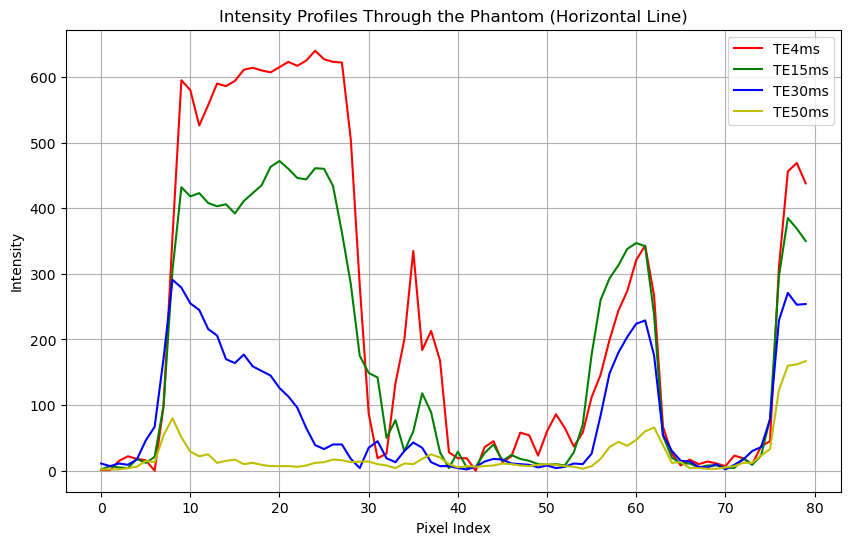

In [ ]:
# Define the row for the horizontal line
line_row = point[1]

# Extract the intensity profile along the horizontal line for each dataset
intensity_profile_1 = i1[line_row, :]
intensity_profile_2 = i2[line_row, :]
intensity_profile_3 = i3[line_row, :]
intensity_profile_4 = i4[line_row, :]

# Plot the intensity profiles
plt.figure(figsize=(10, 6))

plt.plot(intensity_profile_1, label='TE4ms', color='r')
plt.plot(intensity_profile_2, label='TE15ms', color='g')
plt.plot(intensity_profile_3, label='TE30ms', color='b')
plt.plot(intensity_profile_4, label='TE50ms', color='y')

plt.title('Intensity Profiles Through the Phantom (Horizontal Line)')
plt.xlabel('Pixel Index')
plt.ylabel('Intensity')
plt.legend()
plt.grid(True)

# Display the plot
plt.show()

### Find T2* in gel and phantom

Phantom Voxel - Fitted S0: 678.3258447613883, T2*: 51.13374766144909 ms
Gel Voxel - Fitted S0: 521.6256144599291, T2*: 45.32535698682876 ms


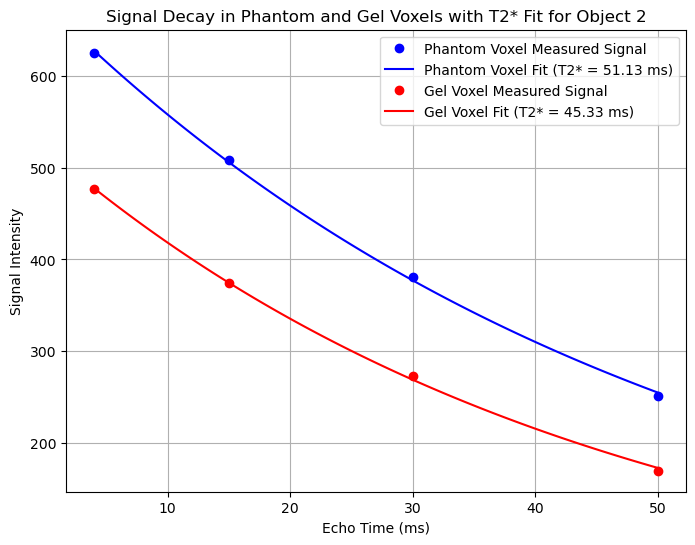

In [ ]:
from scipy.optimize import curve_fit
# Define the correct file paths for the 4 datasets
path = 'MR_phantom_data/'
files = [
    'A_DTU22481_20240910093808_TE4ms_TR100ms_FA20.nii.gz',
    'A_DTU22481_20240910093808_TE15ms_TR100ms_FA20.nii.gz',
    'A_DTU22481_20240910093808_TE30ms_TR100ms_FA20.nii.gz',
    'A_DTU22481_20240910093808_TE50ms_TR100ms_FA20.nii.gz'
]

# Load the datasets
v1 = nib.load(path + files[0]).get_fdata()
v2 = nib.load(path + files[1]).get_fdata()
v3 = nib.load(path + files[2]).get_fdata()
v4 = nib.load(path + files[3]).get_fdata()


# Define the voxel coordinates for phantom (already chosen) and gel
phantom_voxel_coords = (17,39,141)
gel_voxel_coords = (20, 22, 120) 

# Extract the signal from the phantom voxel for each dataset
signal_phantom_1 = v1_cropped[phantom_voxel_coords]
signal_phantom_2 = v2_cropped[phantom_voxel_coords]
signal_phantom_3 = v3_cropped[phantom_voxel_coords]
signal_phantom_4 = v4_cropped[phantom_voxel_coords]

# Extract the signal from the gel voxel for each dataset
signal_gel_1 = v1_cropped[gel_voxel_coords]
signal_gel_2 = v2_cropped[gel_voxel_coords]
signal_gel_3 = v3_cropped[gel_voxel_coords]
signal_gel_4 = v4_cropped[gel_voxel_coords]

# Echo times corresponding to each dataset
TEs = np.array([4, 15, 30, 50])  # In milliseconds
# TEs = np.array([4, 15])  # In milliseconds


# Signals for each voxel at different echo times
signals_phantom = np.array([signal_phantom_1, signal_phantom_2, signal_phantom_3, signal_phantom_4])
signals_gel = np.array([signal_gel_1, signal_gel_2, signal_gel_3, signal_gel_4])

# signals_phantom = np.array([signal_phantom_1, signal_phantom_2])
# signals_gel = np.array([signal_gel_1, signal_gel_2 ])

# Fit the logarithm of the signals for phantom voxel
def signal_decay(TE, S0, T2_star):
    return S0 * np.exp(-TE / T2_star)

# Fit the data for phantom voxel
params_phantom, _ = curve_fit(signal_decay, TEs, signals_phantom)
S0_fit_phantom, T2_star_fit_phantom = params_phantom

# Fit the data for gel voxel
params_gel, _ = curve_fit(signal_decay, TEs, signals_gel)
S0_fit_gel, T2_star_fit_gel = params_gel

# Print the fitted parameters for both voxels
print(f"Phantom Voxel - Fitted S0: {S0_fit_phantom}, T2*: {T2_star_fit_phantom} ms")
print(f"Gel Voxel - Fitted S0: {S0_fit_gel}, T2*: {T2_star_fit_gel} ms")

# Generate values for plotting the fitted curve
TE_plot = np.linspace(min(TEs), max(TEs), 100)
signal_fitted_phantom = signal_decay(TE_plot, S0_fit_phantom, T2_star_fit_phantom)
signal_fitted_gel = signal_decay(TE_plot, S0_fit_gel, T2_star_fit_gel)

# Plot the original data and the fitted curve for both voxels
plt.figure(figsize=(8, 6))

# Plot the measured signals for phantom voxel
plt.plot(TEs, signals_phantom, 'bo', label='Phantom Voxel Measured Signal')
plt.plot(TE_plot, signal_fitted_phantom, 'b-', label=f'Phantom Voxel Fit (T2* = {T2_star_fit_phantom:.2f} ms)')

# Plot the measured signals for gel voxel
plt.plot(TEs, signals_gel, 'ro', label='Gel Voxel Measured Signal')
plt.plot(TE_plot, signal_fitted_gel, 'r-', label=f'Gel Voxel Fit (T2* = {T2_star_fit_gel:.2f} ms)')

# Labels and title
plt.xlabel('Echo Time (ms)')
plt.ylabel('Signal Intensity')
plt.title('Signal Decay in Phantom and Gel Voxels with T2* Fit for Object 2')
plt.legend()
plt.grid(True)

# Display the plot
plt.show()